# CNN - 기초 Again

In [5]:
from tensorflow.keras import models, layers, Model
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout, ZeroPadding2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import EfficientNetB4, EfficientNetB6, ResNet50V2

In [6]:
import tensorflow as tf

import scikitplot as skplt
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import PIL
import os

# 1. 기본 이미지 변수로 다루기

In [7]:
# 현재 폴더에 파일들 확인하기
os.chdir('Data/CNN')

# 2. 이미지 여러장 읽기

In [8]:
ImageSize = (56, 56)

## Train 데이터 모두 읽기

In [9]:
Train_x = []
Train_y = []
for FileName in os.listdir('TRAIN/akiec/'):
    Train_x.append(PIL.Image.open('TRAIN/akiec/' + FileName).resize(ImageSize))
    Train_y.append(0)
    
for FileName in os.listdir('TRAIN/melanoma/'):
    Train_x.append(PIL.Image.open('TRAIN/melanoma/' + FileName).resize(ImageSize))
    Train_y.append(1)

In [10]:
Train_x = np.stack(Train_x, axis=0 )
Train_y = np.array(Train_y)

In [11]:
print(Train_x.shape)
print(Train_y.shape)

(540, 56, 56, 3)
(540,)


# Test 데이터 모두 읽기

In [12]:
# List로 모든 이미지 읽은 후, numpy array로 수정
Test_x = []
Test_y = []
for FileName in os.listdir('Test/akiec/'):
    Test_x.append(PIL.Image.open('Test/akiec/' + FileName).resize(ImageSize))
    Test_y.append(0)
    
for FileName in os.listdir('Test/melanoma/'):
    Test_x.append(PIL.Image.open('Test/melanoma/' + FileName).resize(ImageSize))
    Test_y.append(1)

In [13]:
Test_x = np.stack(Test_x, axis=0 )
Test_y = np.array(Test_y)

In [14]:
print(Test_x.shape)
print(Test_y.shape)

(60, 56, 56, 3)
(60,)


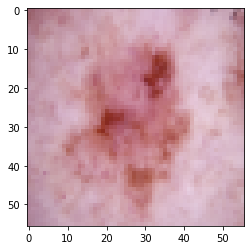

In [15]:
plt.imshow(Train_x[0], interpolation='nearest')
plt.show()

<br><br><br><br><br>

# 3. 가장 기본적인 CNN 모델 구현하기

In [16]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(1, (3, 3), activation='linear', input_shape=(56, 56, 3,)))
model = Model(inputs=model.input, outputs=model.output)

Parameter가 28개인 이유: RGB 3개의 56*56에 따른 3*3 filter 3개 + 상수 b<br>

(3 * 3) (filter) * 3 (RGB) + 1 (constant) = 28

In [17]:
# filter size: 3*3 이므로, 56*56 -> 54*54로 이미지 크기 줄어듬
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 56, 56, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 54, 54, 1)         28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


Input의 shape 및 prediction을 통한 연산

In [18]:
Test_x[:1].shape

(1, 56, 56, 3)

In [19]:
Predicted = model.predict(Test_x[:1])

1/1 [==============================] - 0s 298ms/step


In [20]:
Predicted.shape

(1, 54, 54, 1)

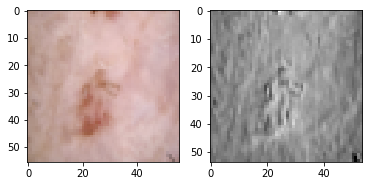

In [21]:
fig = plt.figure(figsize=(6, 3))

fig.add_subplot(1, 2, 1) # row, column, n번째 image
plt.imshow(Test_x[0], interpolation='nearest')

fig.add_subplot(1, 2, 2)
plt.imshow(Predicted[0], interpolation='nearest', cmap = 'gray')

In [22]:
weights = model.get_weights()

In [23]:
weights[1]

array([0.], dtype=float32)

In [24]:
weights[0].shape

(3, 3, 3, 1)

In [25]:
weights[0][0]

array([[[-0.09032515],
        [-0.3163409 ],
        [ 0.07380524]],

       [[ 0.21170276],
        [ 0.394261  ],
        [-0.24969077]],

       [[ 0.22369254],
        [-0.13315591],
        [-0.2869691 ]]], dtype=float32)

In [26]:
weights[0][1]

array([[[ 0.04343519],
        [-0.30308536],
        [-0.11390021]],

       [[ 0.02380496],
        [ 0.177769  ],
        [ 0.3596282 ]],

       [[-0.16911273],
        [ 0.37214696],
        [-0.04633906]]], dtype=float32)

In [27]:
weights[0][2]

array([[[-0.03661606],
        [-0.3190099 ],
        [-0.17573573]],

       [[ 0.38812053],
        [ 0.3567236 ],
        [ 0.0767782 ]],

       [[ 0.39875102],
        [-0.11188024],
        [-0.2572984 ]]], dtype=float32)

3 (filter 3)<br>
3 (filter 3)<br>
3 (RGB 3)<br>
3 (unit 1)<br>

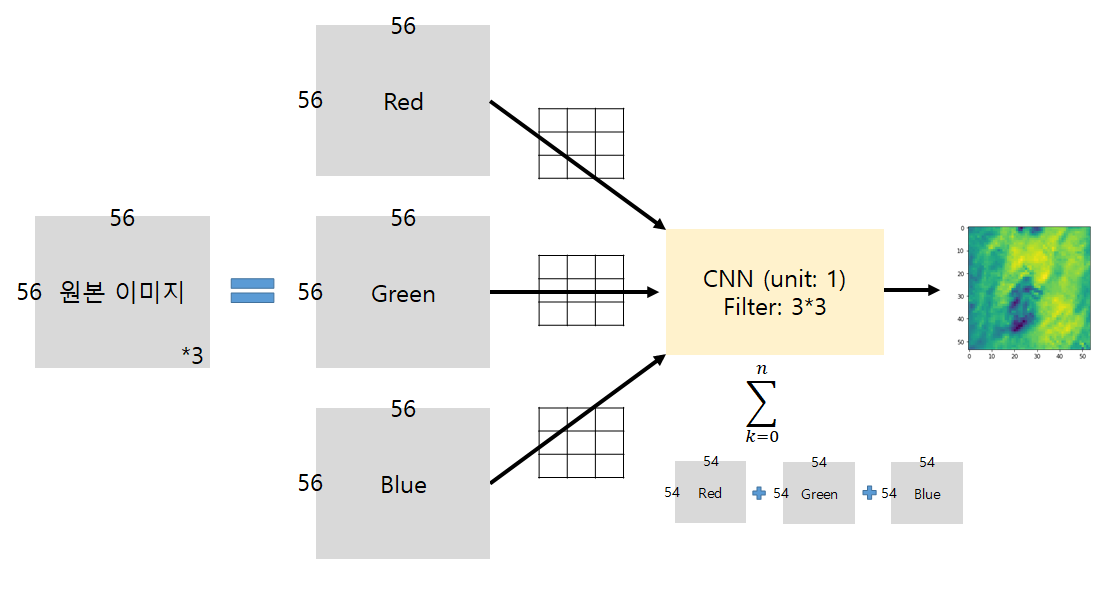

In [28]:
from IPython.display import Image
Image('CNN.png')


<br><br><br><br><br>

# 4. Padding이 포함된 Convolution 구현하기

In [29]:
model = models.Sequential()
model.add(tf.keras.layers.Conv2D(1, (3, 3), activation='linear', padding='same', input_shape=(56, 56, 3,)))

model = Model(inputs=model.input, outputs=model.output)

In [30]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1_input (InputLayer)  [(None, 56, 56, 3)]      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 1)         28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


<br><br><br><br><br>

# 5. Unit이 여러개인 Convolution

In [31]:
model = models.Sequential()
model.add(tf.keras.layers.Conv2D(5, (3, 3), activation='linear', padding='same', input_shape=(56, 56, 3,)))

model = Model(inputs=model.input, outputs=model.output)

In [32]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2_input (InputLayer)  [(None, 56, 56, 3)]      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 5)         140       
                                                                 
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________


In [33]:
# 9: one of Filter 3*3
# 3: RGB
# 5: Unit 5
# +5 : Constants

(9 * 3 * 5) + 5

140

In [34]:
# 예측값 확인하기
Predicted = model.predict(Train_x[:3])

1/1 [==============================] - 0s 86ms/step


In [35]:
Predicted.shape

(3, 56, 56, 5)

In [36]:
Weights = model.get_weights()
len(Weights)

2

In [37]:
Weights[0].shape

(3, 3, 3, 5)

3 (filter 3)<br>
3 (filter 3)<br>
3 (RGB 3)<br>
5 (unit 5)<br>

<br><br><br><br><br><br>

activation function: relu

In [38]:
model = models.Sequential()
model.add(tf.keras.layers.Conv2D(5, (3, 3), activation='relu', padding='same', input_shape=(56, 56, 3,)))
model = Model(inputs=model.input, outputs=model.output)

In [39]:
Predicted = model.predict(Test_x[:1])

1/1 [==============================] - 0s 62ms/step


In [40]:
Predicted.shape

(1, 56, 56, 5)

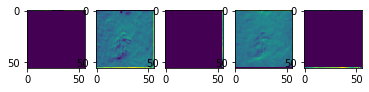

In [41]:
fig = plt.figure(figsize=(6, 3))

fig.add_subplot(1, 5, 1) # row, column, n번째 image
plt.imshow(Predicted[0,:,:,0], interpolation='nearest')

fig.add_subplot(1, 5, 2) # row, column, n번째 image
plt.imshow(Predicted[0,:,:,1], interpolation='nearest')

fig.add_subplot(1, 5, 3) # row, column, n번째 image
plt.imshow(Predicted[0,:,:,2], interpolation='nearest')

fig.add_subplot(1, 5, 4) # row, column, n번째 image
plt.imshow(Predicted[0,:,:,3], interpolation='nearest')

fig.add_subplot(1, 5, 5) # row, column, n번째 image
plt.imshow(Predicted[0,:,:,4], interpolation='nearest')

<결과값에 0 미만이 존재하지 않음>

In [42]:
Predicted[0]

array([[[  0.       ,   0.       ,   0.       , 123.33495  ,
           0.       ],
        [  8.899339 ,   0.       ,   0.       , 139.57208  ,
          13.6160345],
        [  9.994928 ,   0.       ,   0.       , 141.12222  ,
          12.707687 ],
        ...,
        [ 20.427103 ,   0.       ,   0.       , 160.05782  ,
          18.048538 ],
        [ 15.751206 ,   0.       ,   0.       , 151.86911  ,
          18.432438 ],
        [ 20.950718 ,   0.       ,  30.939054 , 124.15358  ,
          19.31641  ]],

       [[  0.       ,  50.137486 ,   0.       ,  92.59097  ,
           0.       ],
        [  0.       ,  46.398197 ,   0.       ,  71.08693  ,
           0.       ],
        [  0.       ,  46.616444 ,   0.       ,  72.76796  ,
           0.       ],
        ...,
        [  0.       ,  55.423973 ,   0.       ,  74.45916  ,
           0.       ],
        [  0.       ,  56.25349  ,   0.       ,  72.005905 ,
           0.       ],
        [  0.       , 110.29868  ,  24.288284 , 

<br><br><br><br><br>

# 6. Flatten layer를 활용하여 vector로 만들기

In [43]:
model = models.Sequential()
model.add(tf.keras.layers.Conv2D(5, (3, 3), activation='linear', padding='same', input_shape=(56, 56, 3,)))
model.add(tf.keras.layers.Flatten())
model = Model(inputs=model.input, outputs=model.output)

In [44]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4_input (InputLayer)  [(None, 56, 56, 3)]      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 56, 56, 5)         140       
                                                                 
 flatten (Flatten)           (None, 15680)             0         
                                                                 
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________


In [45]:
Predicted = model.predict(Train_x[:1])

1/1 [==============================] - 0s 61ms/step


In [46]:
Predicted

array([[  21.646072,   10.208139,   13.387365, ..., -101.90346 ,
         175.75026 ,   62.000034]], dtype=float32)

<br><br><br><br><br>

# 7. Fine-tuning이 가능한 모델 구현하기

In [47]:
model = models.Sequential()
model.add(tf.keras.layers.Conv2D(5, (3, 3), activation='linear', padding='same', input_shape=(56, 56, 3,)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation='linear'))
model = Model(inputs=model.input, outputs=model.output)

In [48]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5_input (InputLayer)  [(None, 56, 56, 3)]      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 5)         140       
                                                                 
 flatten_1 (Flatten)         (None, 15680)             0         
                                                                 
 dense (Dense)               (None, 1)                 15681     
                                                                 
Total params: 15,821
Trainable params: 15,821
Non-trainable params: 0
_________________________________________________________________


In [49]:
Predicted = model.predict(Train_x[:1])
Predicted.shape

1/1 [==============================] - 0s 55ms/step


(1, 1)

In [50]:
print(Predicted)

[[-61.63608]]


## fine tuning

Loss: Mean Squared Error

In [51]:
model.compile(optimizer='adam', loss='mse')

In [52]:
model.fit(x=Train_x, y=Train_y, epochs=50)

Epoch 1/50
17/17 [==============================] - 1s 21ms/step - loss: 137709.7344
Epoch 2/50
17/17 [==============================] - 0s 21ms/step - loss: 12064.5410
Epoch 3/50
17/17 [==============================] - 0s 20ms/step - loss: 2056.5938
Epoch 4/50
17/17 [==============================] - 0s 22ms/step - loss: 525.3362
Epoch 5/50
17/17 [==============================] - 0s 20ms/step - loss: 324.1226
Epoch 6/50
17/17 [==============================] - 0s 21ms/step - loss: 230.7181
Epoch 7/50
17/17 [==============================] - 0s 23ms/step - loss: 211.2263
Epoch 8/50
17/17 [==============================] - 0s 20ms/step - loss: 192.3998
Epoch 9/50
17/17 [==============================] - 0s 20ms/step - loss: 178.5453
Epoch 10/50
17/17 [==============================] - 0s 19ms/step - loss: 165.6668
Epoch 11/50
17/17 [==============================] - 0s 20ms/step - loss: 156.6451
Epoch 12/50
17/17 [==============================] - 0s 23ms/step - loss: 146.9633
Epoch 1

Test data 전체에 prediction 수행해보기

In [53]:
Predicted = model.predict(Test_x)

2/2 [==============================] - 0s 18ms/step


In [54]:
Predicted[:10]

array([[  1.4497986 ],
       [  0.06966595],
       [  0.04749589],
       [-10.873439  ],
       [ -8.276285  ],
       [ -0.12833591],
       [ -4.2704163 ],
       [-15.235077  ],
       [ -6.6030884 ],
       [ 14.198961  ]], dtype=float32)

In [55]:
# A = 0.5 이상이면 True return
# B = 정답이 1이면 True, 
# A == B = 정답
# A != B => 틀림

CheckSame = [Pred == Label for Pred, Label in zip(Predicted>0.5, Test_y == 1)]
pd.Series(CheckSame).value_counts()

# 정확도: 30 / 60 = 50%

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[True]     35
[False]    25
dtype: int64

Loss: Mean Squared Error 는 regression에 사용하는 것.<br>
-> Cross-entropy를 적용하여야함

activation function을 Sigmoid function을 활용하여, output을 0~1 사이로 바꿔줘야함<br>

<br><br><br>
model optimizer에 대한 confitures 확인하기

In [56]:
model.optimizer.get_config()

{'name': 'Adam',
 'learning_rate': 0.001,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

<br><br><br><br><br><br><br>

# 8. Sigmoid function & CrossEntropy를 활용한 classification

In [57]:
model = models.Sequential()
model.add(tf.keras.layers.Conv2D(5, (3, 3), activation='linear', padding='same', input_shape=(56, 56, 3,)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model = Model(inputs=model.input, outputs=model.output)

In [58]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [59]:
model.fit(x=Train_x, y=Train_y, epochs=50)

Epoch 1/50
17/17 [==============================] - 1s 21ms/step - loss: 363.8933
Epoch 2/50
17/17 [==============================] - 0s 24ms/step - loss: 122.2283
Epoch 3/50
17/17 [==============================] - 0s 28ms/step - loss: 54.8321
Epoch 4/50
17/17 [==============================] - 0s 22ms/step - loss: 13.3707
Epoch 5/50
17/17 [==============================] - 0s 21ms/step - loss: 9.7525
Epoch 6/50
17/17 [==============================] - 0s 25ms/step - loss: 7.9756
Epoch 7/50
17/17 [==============================] - 0s 22ms/step - loss: 3.5506
Epoch 8/50
17/17 [==============================] - 0s 24ms/step - loss: 2.7930
Epoch 9/50
17/17 [==============================] - 0s 22ms/step - loss: 3.3473
Epoch 10/50
17/17 [==============================] - 0s 23ms/step - loss: 4.4478
Epoch 11/50
17/17 [==============================] - 0s 26ms/step - loss: 3.8673
Epoch 12/50
17/17 [==============================] - 0s 27ms/step - loss: 2.3998
Epoch 13/50
17/17 [============

In [60]:
Predicted = model.predict(Test_x)

2/2 [==============================] - 0s 27ms/step


In [61]:
Predicted

array([[7.8974976e-05],
       [9.9987167e-01],
       [3.8914606e-01],
       [3.4604781e-20],
       [4.2122665e-09],
       [9.9191946e-01],
       [3.6899923e-18],
       [4.3766341e-23],
       [2.0308008e-04],
       [5.1018375e-04],
       [6.1758069e-32],
       [7.2508922e-12],
       [9.3350261e-03],
       [7.0790455e-05],
       [8.8806581e-01],
       [4.9820936e-15],
       [2.2419388e-03],
       [6.2826206e-05],
       [1.4082517e-17],
       [6.3104668e-21],
       [7.5412220e-18],
       [2.9079102e-03],
       [2.1049246e-08],
       [5.0882731e-10],
       [1.7512107e-06],
       [5.0607730e-11],
       [9.9789512e-01],
       [7.0614704e-14],
       [1.2459303e-16],
       [9.2822965e-08],
       [3.8286540e-05],
       [9.9903774e-01],
       [9.9924964e-01],
       [9.9999988e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9999923e-01],
       [1.0000000e+00],
       [9.9999988e-01],
       [9.9999988e-01],
       [1.0000000e+00],
       [1.000000

In [62]:
CheckSame = [Pred == Label for Pred, Label in zip(Predicted>0.5, Test_y == 1)]
pd.Series(CheckSame).value_counts()

# 정확도: 46 / 60 = 76.67%

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[True]     52
[False]     8
dtype: int64

# 9.CNN Wide 하게 구현하기

In [63]:
model = models.Sequential()
model.add(tf.keras.layers.Conv2D(30, (3, 3), activation='linear', padding='same', input_shape=(56, 56, 3,)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model = Model(inputs=model.input, outputs=model.output)

In [64]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [65]:
model.fit(x=Train_x, y=Train_y, epochs=50)

Epoch 1/50
17/17 [==============================] - 2s 42ms/step - loss: 919.3019
Epoch 2/50
17/17 [==============================] - 1s 36ms/step - loss: 211.1248
Epoch 3/50
17/17 [==============================] - 1s 34ms/step - loss: 37.1892
Epoch 4/50
17/17 [==============================] - 1s 33ms/step - loss: 11.0409
Epoch 5/50
17/17 [==============================] - 1s 33ms/step - loss: 5.7355
Epoch 6/50
17/17 [==============================] - 1s 33ms/step - loss: 3.3148
Epoch 7/50
17/17 [==============================] - 1s 33ms/step - loss: 1.3462
Epoch 8/50
17/17 [==============================] - 1s 44ms/step - loss: 0.9285
Epoch 9/50
17/17 [==============================] - 1s 45ms/step - loss: 0.5653
Epoch 10/50
17/17 [==============================] - 1s 43ms/step - loss: 0.4522
Epoch 11/50
17/17 [==============================] - 1s 40ms/step - loss: 0.1749
Epoch 12/50
17/17 [==============================] - 1s 48ms/step - loss: 0.2086
Epoch 13/50
17/17 [============

In [66]:
Predicted = model.predict(Test_x)

2/2 [==============================] - 0s 16ms/step


In [67]:
CheckSame = [Pred == Label for Pred, Label in zip(Predicted>0.5, Test_y == 1)]
pd.Series(CheckSame).value_counts()

# 정확도: 51 / 60 = 86.67%

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[True]     53
[False]     7
dtype: int64

# 10.CNN Deep 하게 구현하기

Activation function에 relu를 사용해본다.

In [68]:
model = models.Sequential()
model.add(tf.keras.layers.Conv2D(5, (3, 3), activation='relu', padding='same', input_shape=(56, 56, 3,)))
model.add(tf.keras.layers.Conv2D(5, (3, 3), activation='relu', padding='same', input_shape=(56, 56, 3,)))
model.add(tf.keras.layers.Conv2D(5, (3, 3), activation='relu', padding='same', input_shape=(56, 56, 3,)))
model.add(tf.keras.layers.Conv2D(5, (3, 3), activation='relu', padding='same', input_shape=(56, 56, 3,)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model = Model(inputs=model.input, outputs=model.output)

In [69]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8_input (InputLayer)  [(None, 56, 56, 3)]      0         
                                                                 
 conv2d_8 (Conv2D)           (None, 56, 56, 5)         140       
                                                                 
 conv2d_9 (Conv2D)           (None, 56, 56, 5)         230       
                                                                 
 conv2d_10 (Conv2D)          (None, 56, 56, 5)         230       
                                                                 
 conv2d_11 (Conv2D)          (None, 56, 56, 5)         230       
                                                                 
 flatten_4 (Flatten)         (None, 15680)             0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1568

In [70]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [71]:
model.fit(x=Train_x, y=Train_y, epochs=15)

Epoch 1/15
17/17 [==============================] - 3s 111ms/step - loss: 17.1786
Epoch 2/15
17/17 [==============================] - 2s 146ms/step - loss: 1.7740
Epoch 3/15
17/17 [==============================] - 2s 131ms/step - loss: 0.9361
Epoch 4/15
17/17 [==============================] - 2s 126ms/step - loss: 0.6931
Epoch 5/15
17/17 [==============================] - 2s 129ms/step - loss: 0.4189
Epoch 6/15
17/17 [==============================] - 3s 163ms/step - loss: 0.2963
Epoch 7/15
17/17 [==============================] - 3s 208ms/step - loss: 0.2160
Epoch 8/15
17/17 [==============================] - 4s 221ms/step - loss: 0.1798
Epoch 9/15
17/17 [==============================] - 3s 205ms/step - loss: 0.1137
Epoch 10/15
17/17 [==============================] - 3s 185ms/step - loss: 0.0889
Epoch 11/15
17/17 [==============================] - 3s 161ms/step - loss: 0.0770
Epoch 12/15
17/17 [==============================] - 3s 159ms/step - loss: 0.0552
Epoch 13/15
17/17 [=====

In [72]:
Predicted = model.predict(Train_x)

CheckSame = [Pred == Label for Pred, Label in zip(Predicted>0.5, Train_y == 1)]
pd.Series(CheckSame).value_counts()

# 정확도: 50 / 60 = 85%

17/17 [==============================] - 1s 60ms/step


TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[True]    540
dtype: int64

In [73]:
Predicted = model.predict(Test_x)

CheckSame = [Pred == Label for Pred, Label in zip(Predicted>0.5, Test_y == 1)]
pd.Series(CheckSame).value_counts()

# 정확도: 50 / 60 = 85%

2/2 [==============================] - 0s 35ms/step


TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[True]     49
[False]    11
dtype: int64

<br><br><br><br>
# 11. Test Data Set에 fit 해보기

In [74]:
model = models.Sequential()
model.add(tf.keras.layers.Conv2D(5, (3, 3), activation='relu', padding='same', input_shape=(56, 56, 3,)))
model.add(tf.keras.layers.Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(56, 56, 3,)))
model.add(tf.keras.layers.Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(56, 56, 3,)))
model.add(tf.keras.layers.Conv2D(5, (3, 3), activation='relu', padding='same', input_shape=(56, 56, 3,)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model = Model(inputs=model.input, outputs=model.output)

In [75]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [76]:
model.fit(x=Train_x, y=Train_y, epochs=15, validation_data=(Test_x, Test_y))

Epoch 1/15
17/17 [==============================] - 5s 208ms/step - loss: 13.4619 - val_loss: 1.4131
Epoch 2/15
17/17 [==============================] - 3s 190ms/step - loss: 0.7125 - val_loss: 0.3409
Epoch 3/15
17/17 [==============================] - 4s 225ms/step - loss: 0.4071 - val_loss: 0.2812
Epoch 4/15
17/17 [==============================] - 4s 237ms/step - loss: 0.3336 - val_loss: 0.2713
Epoch 5/15
17/17 [==============================] - 4s 246ms/step - loss: 0.2807 - val_loss: 0.3076
Epoch 6/15
17/17 [==============================] - 4s 215ms/step - loss: 0.2465 - val_loss: 0.3143
Epoch 7/15
17/17 [==============================] - 4s 217ms/step - loss: 0.2434 - val_loss: 0.3833
Epoch 8/15
17/17 [==============================] - 4s 227ms/step - loss: 0.1937 - val_loss: 0.4367
Epoch 9/15
17/17 [==============================] - 4s 214ms/step - loss: 0.1714 - val_loss: 0.6156
Epoch 10/15
17/17 [==============================] - 4s 232ms/step - loss: 0.1712 - val_loss: 0.482

In [78]:
Predicted = model.predict(Test_x)

CheckSame = [Pred == Label for Pred, Label in zip(Predicted>0.5, Test_y == 1)]
pd.Series(CheckSame).value_counts()

# 정확도: 55 / 60 = 85%

2/2 [==============================] - 0s 35ms/step


TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[True]     52
[False]     8
dtype: int64

validation data는 학습에 포함되는 데이터가 아니므로, weight에 영향을 주지 않는다.<br>
다만, epoch을 돌면서 validation set에 성능이 얼마나 잘 나오는지 확인할 수 있다.

1. Validation loss를 통해서 언제쯤 부터 overfit이 일어나는지 알 수 있다. <br><br>
2. 그럼 언제 모델이 best인지도 알 수 있다.<br>
 -> best 모델을 저장하려면?<br>
 -> call-back 함수를 써라

<br><br><br><br><br>
# 12. Metric에 accuracy 추가해보기

In [79]:
model = models.Sequential()
model.add(tf.keras.layers.Conv2D(5, (3, 3), activation='relu', padding='same', input_shape=(56, 56, 3,)))
model.add(tf.keras.layers.Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(56, 56, 3,)))
model.add(tf.keras.layers.Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(56, 56, 3,)))
model.add(tf.keras.layers.Conv2D(5, (3, 3), activation='relu', padding='same', input_shape=(56, 56, 3,)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model = Model(inputs=model.input, outputs=model.output)

In [80]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc', 'mse', 'mae'])

In [81]:
model.fit(x=Train_x, y=Train_y, epochs=15, validation_data=(Test_x, Test_y))

Epoch 1/15
17/17 [==============================] - 4s 180ms/step - loss: 18.4537 - acc: 0.5444 - mse: 0.4087 - mae: 0.4692 - val_loss: 1.0305 - val_acc: 0.5333 - val_mse: 0.3536 - val_mae: 0.4820
Epoch 2/15
17/17 [==============================] - 3s 175ms/step - loss: 0.7969 - acc: 0.5407 - mse: 0.2867 - mae: 0.4809 - val_loss: 0.7689 - val_acc: 0.5667 - val_mse: 0.2811 - val_mae: 0.4848
Epoch 3/15
17/17 [==============================] - 3s 198ms/step - loss: 0.6768 - acc: 0.5944 - mse: 0.2409 - mae: 0.4646 - val_loss: 0.6715 - val_acc: 0.5667 - val_mse: 0.2414 - val_mae: 0.4765
Epoch 4/15
17/17 [==============================] - 3s 190ms/step - loss: 0.6454 - acc: 0.6222 - mse: 0.2269 - mae: 0.4511 - val_loss: 0.6263 - val_acc: 0.6667 - val_mse: 0.2210 - val_mae: 0.4514
Epoch 5/15
17/17 [==============================] - 3s 201ms/step - loss: 0.6350 - acc: 0.6296 - mse: 0.2228 - mae: 0.4381 - val_loss: 0.6295 - val_acc: 0.6167 - val_mse: 0.2219 - val_mae: 0.4438
Epoch 6/15
17/17 [=

Test set을 validation으로 활용하면, 가장 잘 나온 모델을 선택할 수 있음<br>
사실 이것은 Test set에 대한 fitting 이므로, 자제해야함<br>
=> Validation set을 따로 구성해야하는 이유

<br><br><br><br><br>
# 13. CallBack 함수, CheckPoint 활용하기

In [82]:
# CheckPoint: Epoch 마다 validation 성능을 검증하여, best performance 일 경우 저장
CP = ModelCheckpoint(filepath='MODEL/{epoch:03d}-{loss:.4f}-{acc:.4f}-{val_loss:.4f}-{val_acc:.4f}.hdf5',
            monitor='val_acc', verbose=1, save_best_only=True, mode='max')

CP = ModelCheckpoint(filepath='MODEL/{epoch:03d}-{loss:.4f}-{acc:.4f}-{val_loss:.4f}-{val_acc:.4f}.hdf5',
            monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [83]:
model = models.Sequential()
model.add(tf.keras.layers.Conv2D(5, (3, 3), activation='relu', padding='same', input_shape=(56, 56, 3,)))
model.add(tf.keras.layers.Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(56, 56, 3,)))
model.add(tf.keras.layers.Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(56, 56, 3,)))
model.add(tf.keras.layers.Conv2D(5, (3, 3), activation='relu', padding='same', input_shape=(56, 56, 3,)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model = Model(inputs=model.input, outputs=model.output)

In [84]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [85]:
model.fit(x=Train_x, y=Train_y, epochs=50, validation_data=(Test_x, Test_y), callbacks=[CP])

Epoch 1/50
17/17 [==============================] - ETA: 0s - loss: 33.1324 - acc: 0.4926
Epoch 1: val_loss improved from inf to 2.11339, saving model to MODEL\001-33.1324-0.4926-2.1134-0.5000.hdf5
17/17 [==============================] - 3s 157ms/step - loss: 33.1324 - acc: 0.4926 - val_loss: 2.1134 - val_acc: 0.5000
Epoch 2/50
17/17 [==============================] - ETA: 0s - loss: 0.9515 - acc: 0.5556
Epoch 2: val_loss improved from 2.11339 to 0.63047, saving model to MODEL\002-0.9515-0.5556-0.6305-0.5667.hdf5
17/17 [==============================] - 3s 185ms/step - loss: 0.9515 - acc: 0.5556 - val_loss: 0.6305 - val_acc: 0.5667
Epoch 3/50
17/17 [==============================] - ETA: 0s - loss: 0.5684 - acc: 0.7426
Epoch 3: val_loss improved from 0.63047 to 0.43542, saving model to MODEL\003-0.5684-0.7426-0.4354-0.8667.hdf5
17/17 [==============================] - 3s 203ms/step - loss: 0.5684 - acc: 0.7426 - val_loss: 0.4354 - val_acc: 0.8667
Epoch 4/50
17/17 [====================

In [86]:
MoelWeights = os.listdir('MODEL')
MoelWeights

['001-0.9483-0.5741-0.5596-0.7667.hdf5',
 '001-17.6085-0.5167-0.6123-0.6833.hdf5',
 '001-33.1324-0.4926-2.1134-0.5000.hdf5',
 '002-0.6302-0.6593-0.4217-0.8500.hdf5',
 '002-0.9515-0.5556-0.6305-0.5667.hdf5',
 '003-0.4429-0.8167-0.3627-0.8833.hdf5',
 '003-0.4488-0.7963-0.4612-0.7833.hdf5',
 '003-0.5684-0.7426-0.4354-0.8667.hdf5',
 '004-0.3659-0.8407-0.4364-0.8333.hdf5',
 '004-0.3680-0.8426-0.2204-0.9333.hdf5',
 '004-0.4083-0.8204-0.3425-0.8833.hdf5',
 '005-0.3194-0.8722-0.3351-0.9167.hdf5',
 '006-0.2295-0.9296-0.5851-0.8667.hdf5',
 '006-0.2586-0.9019-0.2571-0.8833.hdf5',
 '007-0.1818-0.9204-0.2559-0.9333.hdf5',
 '008-0.1401-0.9611-0.1723-0.9500.hdf5']

In [87]:
BestModel = MoelWeights[ len(MoelWeights) -1 ]
BestModel

'008-0.1401-0.9611-0.1723-0.9500.hdf5'

In [88]:
model.load_weights('MODEL/' + BestModel)

In [89]:
Predicted = model.predict(Test_x)

CheckSame = [Pred == Label for Pred, Label in zip(Predicted>0.5, Test_y == 1)]
pd.Series(CheckSame).value_counts()

# 정확도: 54 / 60 = 90%

2/2 [==============================] - 0s 38ms/step


TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[True]     57
[False]     3
dtype: int64

<br><br><br><br><br>
# 14. CallBack 함수, CheckPoint & Reduce LR (Learning Rate) 활용하기

MODEL/ 안에 저장된 weight 파일들은 다시 삭제

In [90]:
# CheckPoint: Epoch 마다 validation 성능을 검증하여, best performance 일 경우 저장
CP = ModelCheckpoint(filepath='MODEL/{epoch:03d}-{loss:.4f}-{acc:.4f}-{val_loss:.4f}-{val_acc:.4f}.hdf5',
            monitor='val_acc', verbose=1, save_best_only=True, mode='max')

# Learning Rate 줄여나가기
LR = ReduceLROnPlateau(monitor='val_loss',factor=0.8,patience=2, verbose=1, min_lr=1e-8)

CALLBACK = [CP, LR]

In [91]:
model = models.Sequential()
model.add(tf.keras.layers.Conv2D(5, (3, 3), activation='relu', padding='same', input_shape=(56, 56, 3,)))
model.add(tf.keras.layers.Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(56, 56, 3,)))
model.add(tf.keras.layers.Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(56, 56, 3,)))
model.add(tf.keras.layers.Conv2D(5, (3, 3), activation='relu', padding='same', input_shape=(56, 56, 3,)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model = Model(inputs=model.input, outputs=model.output)

In [92]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [93]:
model.fit(x=Train_x, y=Train_y, epochs=50, validation_data=(Test_x, Test_y), callbacks=CALLBACK)

Epoch 1/50
17/17 [==============================] - ETA: 0s - loss: 33.4391 - acc: 0.5167
Epoch 1: val_acc improved from -inf to 0.50000, saving model to MODEL\001-33.4391-0.5167-2.1155-0.5000.hdf5
17/17 [==============================] - 4s 216ms/step - loss: 33.4391 - acc: 0.5167 - val_loss: 2.1155 - val_acc: 0.5000 - lr: 0.0010
Epoch 2/50
17/17 [==============================] - ETA: 0s - loss: 0.8395 - acc: 0.5611
Epoch 2: val_acc improved from 0.50000 to 0.61667, saving model to MODEL\002-0.8395-0.5611-0.6381-0.6167.hdf5
17/17 [==============================] - 3s 171ms/step - loss: 0.8395 - acc: 0.5611 - val_loss: 0.6381 - val_acc: 0.6167 - lr: 0.0010
Epoch 3/50
17/17 [==============================] - ETA: 0s - loss: 0.6197 - acc: 0.6611
Epoch 3: val_acc improved from 0.61667 to 0.75000, saving model to MODEL\003-0.6197-0.6611-0.5763-0.7500.hdf5
17/17 [==============================] - 3s 203ms/step - loss: 0.6197 - acc: 0.6611 - val_loss: 0.5763 - val_acc: 0.7500 - lr: 0.0010
E

In [94]:
model.optimizer.get_config()

{'name': 'Adam',
 'learning_rate': 2.2518e-05,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

## tensorboard 사용하기

In [95]:
# CheckPoint: Epoch 마다 validation 성능을 검증하여, best performance 일 경우 저장
CP = ModelCheckpoint(filepath='MODEL/{epoch:03d}-{loss:.4f}-{acc:.4f}-{val_loss:.4f}-{val_acc:.4f}.hdf5',
            monitor='val_acc', verbose=1, save_best_only=True, mode='max')

# tensorboard
TB = TensorBoard(log_dir='logs', write_graph=True, write_images=True)

# Learning Rate 줄여나가기
LR = ReduceLROnPlateau(monitor='val_loss',factor=0.8,patience=2, verbose=1, min_lr=1e-8)

CALLBACK = [CP, TB, LR]

In [96]:
model = models.Sequential()
model.add(tf.keras.layers.Conv2D(5, (3, 3), activation='relu', padding='same', input_shape=(56, 56, 3,)))
model.add(tf.keras.layers.Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(56, 56, 3,)))
model.add(tf.keras.layers.Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(56, 56, 3,)))
model.add(tf.keras.layers.Conv2D(5, (3, 3), activation='relu', padding='same', input_shape=(56, 56, 3,)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model = Model(inputs=model.input, outputs=model.output)

In [97]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [98]:
model.fit(x=Train_x, y=Train_y, epochs=50, validation_data=(Test_x, Test_y), callbacks=CALLBACK)

Epoch 1/50
17/17 [==============================] - ETA: 0s - loss: 5.9075 - acc: 0.5278
Epoch 1: val_acc improved from -inf to 0.50000, saving model to MODEL\001-5.9075-0.5278-0.8253-0.5000.hdf5
17/17 [==============================] - 4s 165ms/step - loss: 5.9075 - acc: 0.5278 - val_loss: 0.8253 - val_acc: 0.5000 - lr: 0.0010
Epoch 2/50
17/17 [==============================] - ETA: 0s - loss: 0.7208 - acc: 0.5815
Epoch 2: val_acc improved from 0.50000 to 0.63333, saving model to MODEL\002-0.7208-0.5815-0.6318-0.6333.hdf5
17/17 [==============================] - 3s 204ms/step - loss: 0.7208 - acc: 0.5815 - val_loss: 0.6318 - val_acc: 0.6333 - lr: 0.0010
Epoch 3/50
17/17 [==============================] - ETA: 0s - loss: 0.6132 - acc: 0.6926
Epoch 3: val_acc improved from 0.63333 to 0.75000, saving model to MODEL\003-0.6132-0.6926-0.5571-0.7500.hdf5
17/17 [==============================] - 4s 242ms/step - loss: 0.6132 - acc: 0.6926 - val_loss: 0.5571 - val_acc: 0.7500 - lr: 0.0010
Epoc

In [99]:
logdir = './logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir)
%load_ext tensorboard
%tensorboard --logdir=./logs --port=6007

http://localhost:6006/

# <br><br><br><br><br>
# 15. Conv-pooling을 활용한 CNN 구현하기

In [100]:
# Pooling이 없는 모델의 경우
model = models.Sequential()
model.add(tf.keras.layers.Conv2D(5, (3, 3), activation='relu', padding='same', input_shape=(56, 56, 3,)))
model.add(tf.keras.layers.Conv2D(5, (3, 3), activation='relu', padding='same', input_shape=(56, 56, 3,)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(3, activation='softmax'))
model = Model(inputs=model.input, outputs=model.output)

In [101]:
model.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32_input (InputLayer  [(None, 56, 56, 3)]      0         
 )                                                               
                                                                 
 conv2d_32 (Conv2D)          (None, 56, 56, 5)         140       
                                                                 
 conv2d_33 (Conv2D)          (None, 56, 56, 5)         230       
                                                                 
 flatten_10 (Flatten)        (None, 15680)             0         
                                                                 
 dense_9 (Dense)             (None, 3)                 47043     
                                                                 
Total params: 47,413
Trainable params: 47,413
Non-trainable params: 0
______________________________________________________

In [102]:
# Pooling이 있는 모델의 경우
model = models.Sequential()
model.add(tf.keras.layers.Conv2D(5, (3, 3), activation='relu', padding='same', input_shape=(56, 56, 3,)))
model.add(tf.keras.layers.Conv2D(5, (3, 3), activation='relu', padding='same', input_shape=(56, 56, 3,)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model = Model(inputs=model.input, outputs=model.output)

In [103]:
model.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34_input (InputLayer  [(None, 56, 56, 3)]      0         
 )                                                               
                                                                 
 conv2d_34 (Conv2D)          (None, 56, 56, 5)         140       
                                                                 
 conv2d_35 (Conv2D)          (None, 56, 56, 5)         230       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 5)        0         
 )                                                               
                                                                 
 flatten_11 (Flatten)        (None, 3920)              0         
                                                                 
 dense_10 (Dense)            (None, 1)                 392

In [104]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [105]:
model.fit(x=Train_x, y=Train_y, epochs=10, validation_data=(Test_x, Test_y), callbacks=CALLBACK)

Epoch 1/10
17/17 [==============================] - ETA: 0s - loss: 22.6025 - acc: 0.5148
Epoch 1: val_acc did not improve from 0.98333
17/17 [==============================] - 2s 92ms/step - loss: 22.6025 - acc: 0.5148 - val_loss: 2.5192 - val_acc: 0.6333 - lr: 0.0010
Epoch 2/10
17/17 [==============================] - ETA: 0s - loss: 5.7390 - acc: 0.5778
Epoch 2: val_acc did not improve from 0.98333
17/17 [==============================] - 2s 99ms/step - loss: 5.7390 - acc: 0.5778 - val_loss: 1.3744 - val_acc: 0.7833 - lr: 0.0010
Epoch 3/10
17/17 [==============================] - ETA: 0s - loss: 2.8129 - acc: 0.6259
Epoch 3: val_acc did not improve from 0.98333
17/17 [==============================] - 1s 87ms/step - loss: 2.8129 - acc: 0.6259 - val_loss: 0.9807 - val_acc: 0.8167 - lr: 0.0010
Epoch 4/10
17/17 [==============================] - ETA: 0s - loss: 1.1238 - acc: 0.7333
Epoch 4: val_acc did not improve from 0.98333
17/17 [==============================] - 2s 88ms/step - los

In [106]:
Predicted = model.predict(Test_x)

CheckSame = [Pred == Label for Pred, Label in zip(Predicted>0.5, Test_y == 1)]
pd.Series(CheckSame).value_counts()

# 정확도: 54 / 60 = 90%

2/2 [==============================] - 0s 34ms/step


TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[True]     50
[False]    10
dtype: int64

# Stride

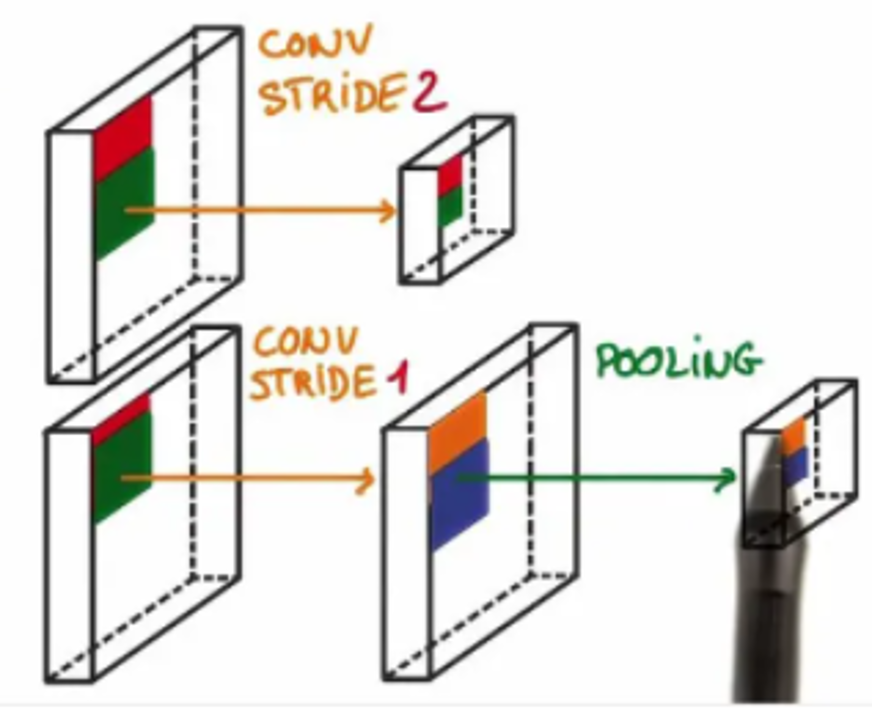

In [107]:
from IPython.display import Image
Image('stride.png')

In [108]:
# Pooling이 있는 모델의 경우
model = models.Sequential()
model.add(tf.keras.layers.Conv2D(5, (3, 3), activation='relu', padding='same', input_shape=(56, 56, 3,)))
model.add(tf.keras.layers.Conv2D(5, (3, 3), activation='relu', padding='same', input_shape=(56, 56, 3,)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1) ))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model = Model(inputs=model.input, outputs=model.output)

model.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36_input (InputLayer  [(None, 56, 56, 3)]      0         
 )                                                               
                                                                 
 conv2d_36 (Conv2D)          (None, 56, 56, 5)         140       
                                                                 
 conv2d_37 (Conv2D)          (None, 56, 56, 5)         230       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 5)        0         
 2D)                                                             
                                                                 
 flatten_12 (Flatten)        (None, 15125)             0         
                                                                 
 dense_11 (Dense)            (None, 1)                 151

In [109]:
# Pooling이 있는 모델의 경우
model = models.Sequential()
model.add(tf.keras.layers.Conv2D(5, (3, 3), activation='relu', padding='same', input_shape=(56, 56, 3,)))
model.add(tf.keras.layers.Conv2D(5, (3, 3), activation='relu', padding='same', input_shape=(56, 56, 3,)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2) ))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model = Model(inputs=model.input, outputs=model.output)

model.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38_input (InputLayer  [(None, 56, 56, 3)]      0         
 )                                                               
                                                                 
 conv2d_38 (Conv2D)          (None, 56, 56, 5)         140       
                                                                 
 conv2d_39 (Conv2D)          (None, 56, 56, 5)         230       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 5)        0         
 2D)                                                             
                                                                 
 flatten_13 (Flatten)        (None, 3920)              0         
                                                                 
 dense_12 (Dense)            (None, 1)                 392

<br><br><br><br><br>
# 16. VGG 논문 구현하기

Title: Very Deep Convolutional Networks for Large-Scale Image Recognition<br>
Search: scholar.google.com

https://arxiv.org/pdf/1409.1556.pdf

In [110]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

################# 여기까지가 CNN, 아래부터는 Fully connected layers

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=1000, activation="softmax"))

In [111]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 226, 226, 3)      0         
 2D)                                                             
                                                                 
 conv2d_40 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 226, 226, 64)     0         
 ng2D)                                                           
                                                                 
 conv2d_41 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                     

In [ ]:
VGGModel = tf.keras.applications.VGG16(include_top=True,
    weights='imagenet', input_shape=(224,224,3))

186875904/553467096 [=========>....................] - ETA: 55s

In [ ]:
VGGModel.summary()

## Final layer 없이 VGG16 불러오기

In [ ]:
VGGModel = tf.keras.applications.VGG16(include_top=False,
    weights='imagenet', input_tensor=None,
    input_shape=(224,224,3), pooling=None)

In [ ]:
VGGModel.summary()

# 17. 일반 이미지 Pretrained model에 넣어보기

https://image.dongascience.com/Photo/2020/03/15856430426741.jpg

In [ ]:
VGGModel = tf.keras.applications.VGG16(include_top=True,
    weights='imagenet', input_shape=(224,224,3))

In [ ]:
from PIL import Image
import requests

url = 'https://image.dongascience.com/Photo/2020/03/15856430426741.jpg'
image = Image.open(requests.get(url, stream=True).raw)

In [ ]:
image

In [ ]:
image = tf.keras.preprocessing.image.img_to_array(image)
image.shape

In [ ]:
import cv2

In [ ]:
image = cv2.resize(image, (224, 224) )
image.shape

In [ ]:
image = np.expand_dims(image, axis=0)
image.shape

In [ ]:
plt.imshow(image[0]/255, interpolation='nearest')
plt.show()

In [ ]:
image = tf.keras.applications.vgg16.preprocess_input(image)
image.shape

In [ ]:
Predicted = VGGModel.predict(image)

In [ ]:
tf.keras.applications.vgg16.decode_predictions(Predicted)

In [ ]:
from tensorflow.keras.applications.vgg16 import decode_predictions

url = 'https://ichef.bbci.co.uk/news/640/cpsprodpb/0C17/production/_110059030_j8aged72breaches_copyright_kennethbalcombcenterforwhaleresearch_20051011kcb_dg1-116.jpg'
image = Image.open(requests.get(url, stream=True).raw)
image = tf.keras.preprocessing.image.img_to_array(image)
image = cv2.resize(image, (224, 224) )
image = np.expand_dims(image, axis=0)
plt.imshow(image[0]/255, interpolation='nearest')
plt.show()
image = tf.keras.applications.vgg16.preprocess_input(image)

In [ ]:
decode_predictions(VGGModel.predict(image))

<br><br><br><br>
# 18. Global Average Pooling

모델 구현

In [ ]:
VGGModel = tf.keras.applications.VGG16(include_top=False,
    weights='imagenet', input_tensor=None,
    input_shape=(224,224,3), pooling=None)

x = GlobalAveragePooling2D()(VGGModel.output)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=VGGModel.input, outputs=predictions)

In [ ]:
model.summary()

In [ ]:
# learning parameter를 더하여 최종 model compile
model.compile(optimizer='adam',
         loss='binary_crossentropy',
         metrics=['acc']
)

데이터 준비

In [ ]:
ImageSize = (224, 224)

Train_x = []
Train_y = []
for FileName in os.listdir('TRAIN/akiec/'):
    Train_x.append(PIL.Image.open('TRAIN/akiec/' + FileName).resize(ImageSize))
    Train_y.append(0)
    
for FileName in os.listdir('TRAIN/melanoma/'):
    Train_x.append(PIL.Image.open('TRAIN/melanoma/' + FileName).resize(ImageSize))
    Train_y.append(1)

# List로 모든 이미지 읽은 후, numpy array로 수정
Test_x = []
Test_y = []
for FileName in os.listdir('Test/akiec/'):
    Test_x.append(PIL.Image.open('Test/akiec/' + FileName).resize(ImageSize))
    Test_y.append(0)
    
for FileName in os.listdir('Test/melanoma/'):
    Test_x.append(PIL.Image.open('Test/melanoma/' + FileName).resize(ImageSize))
    Test_y.append(1)

In [ ]:
Train_x = np.stack(Train_x, axis=0 )
Train_y = np.array(Train_y)

Test_x = np.stack(Test_x, axis=0 )
Test_y = np.array(Test_y)

# Fine tunning

In [ ]:
# CheckPoint: Epoch 마다 validation 성능을 검증하여, best performance 일 경우 저장
CP = ModelCheckpoint(filepath='MODEL/{epoch:03d}-{loss:.4f}-{acc:.4f}-{val_loss:.4f}-{val_acc:.4f}.hdf5',
            monitor='val_acc', verbose=1, save_best_only=True, mode='max')

# Learning Rate 줄여나가기
LR = ReduceLROnPlateau(monitor='val_loss',factor=0.8,patience=2, verbose=1, min_lr=1e-8)

CALLBACK = [CP, LR]

In [ ]:
model.predict(Train_x[:5])

In [ ]:
Train_x[:10].shape

In [ ]:
model.fit(x=Train_x[:10], y=Train_y[:10])

In [ ]:
model.fit(x=Train_x, y=Train_y)

## 너무 느리고, 모든 데이터를 한번에 넣는 것은 성능 저하를 초래

<br><br><br><br><br>
# 19. Generator with VGG16

In [ ]:
import tensorflow as tf
import numpy as np

import pandas as pd
import cv2
import os
import math
import scipy as sp
import PIL

# Tensorflow
from tensorflow.keras import models, layers, Model
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout, ZeroPadding2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import EfficientNetB4, EfficientNetB6, ResNet50V2
#from keras_tuner.tuners import RandomSearch

import scikitplot as skplt
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

In [ ]:
# batch_size: 한번에 forward & Backword 하는 샘플의 수
batch_size = 32

# Training 수
epochs = 50

# Weight 조절 parameter
LearningRate = 1e-3 # 0.001
Decay = 1e-6

img_width = 224
img_height = 224

In [ ]:
# 디렉토리 경로 설정 필요
CurrentDirectory = "./"

train_directory = CurrentDirectory + 'TRAIN/'
test_directory  = CurrentDirectory + 'TEST/'
model_directory = CurrentDirectory + 'MODEL/'
tensorboard_directory = CurrentDirectory + 'Tensorboard'

<모델 정의하기>

In [ ]:
VGGModel = tf.keras.applications.VGG16(include_top=False,
    weights='imagenet', input_tensor=None,
    input_shape=(224,224,3), pooling=None)


x = GlobalAveragePooling2D()(VGGModel.output)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=VGGModel.input, outputs=predictions)


In [ ]:
model.compile(optimizer='adam',
         loss='binary_crossentropy',
         metrics=['acc']
) # 나이를, MSE

<Training / Validation data with generator>

In [ ]:
# Online-augmentation 적용 Generator
# 1. 이미지를 전부다 불러서 램 (메모리)에 올릴 수 없기 때문
# 2. 이미지는 Augmentation을 해주는게 좋아서

DATAGEN_TRAIN = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    featurewise_center=True,
    featurewise_std_normalization=True,
    data_format="channels_last",
    validation_split=0.10) # Train / Validation

In [ ]:
TRAIN_GENERATOR = DATAGEN_TRAIN.flow_from_directory(
    train_directory,
    classes=["akiec", "melanoma"],
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode= "binary", 0, 1 # category [1,0]. [0,1] 일 경우 -> Final layer: unit2 softmax
    subset = "training")

VALID_GENERATOR = DATAGEN_TRAIN.flow_from_directory(
    train_directory,
    classes=["akiec", "melanoma"],
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode= "categorical",
    subset = "validation")

< Test data with generator >

In [ ]:
DATAGEN_TEST = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    data_format="channels_last")

In [ ]:
# 중요한 argument: shuffle
# 중요한 argument: class_mode

TEST_GENERATOR = DATAGEN_TEST.flow_from_directory(
    test_directory,
    classes=["akiec", "melanoma"],
    target_size = (img_height, img_width),
    batch_size = batch_size,
    shuffle = False,
    class_mode='binary')

## Fine tunning

In [ ]:
# CheckPoint: Epoch 마다 validation 성능을 검증하여, best performance 일 경우 저장
CP = ModelCheckpoint(filepath='MODEL/{epoch:03d}-{loss:.4f}-{acc:.4f}-{val_loss:.4f}-{val_acc:.4f}.hdf5',
            monitor='val_acc', verbose=1, save_best_only=True, mode='max')

# Learning Rate 줄여나가기
LR = ReduceLROnPlateau(monitor='val_loss',factor=0.8,patience=2, verbose=1, min_lr=1e-8)

CALLBACK = [CP, LR]

In [ ]:
model.fit_generator(
    TRAIN_GENERATOR,
    epochs=20,
    callbacks=CALLBACK,
    shuffle=True,
    validation_data=TEST_GENERATOR)
